<center><img src="images/ML_video_w_s.webp" style="margin: 20 auto;"></center>
<p style="font-family: Protomolecule; font-size: 2.3em; line-height: 90%; margin: 0 auto; text-align: center; width: 100%;"><span style="letter-spacing: .1rem;">Machine</span><br><span style="letter-spacing: -.1rem;">Learning</span></p>
<p class="author" style="font-family: Protomolecule; margin: 0px auto;  text-align: center; width: 100%; font-size: 1.2em;">Joern Ploennigs</p>
<p class="subtitle" style="font-family: Protomolecule; font-size: larger; margin: 1em auto; text-align: center; width: 100%; font-size: 1.2em;">Klassifikation</p>

# Klassifikation

![](images/midjourney_blind_forest.png)
> Den Wald vor lauter Bäumen nicht sehen
> 
> — Christoph Martin Wieland

Die Klassifikation ist die zweite wichtige Problemstellung im Supervised Learning dessen Ziel es ist für eine Menge an Daten vorher bekannte Klassen zu lernen und diese für neue Datensätze vorherzusagen. Bei den Klassen kann es sich um binäre Daten handeln (z.B. Ja/Nein, Ein/Aus) oder kategorische Daten (z.B. Kalt, Normal, Warm). Sie können aber auch zur Vorhersage numerischer Daten genutzt werden - genauso wie Logistische Regressionsmodelle zur Vorhersage binärer Daten verwendet werden können.

Klassifikationsmodelle werden in der Praxis häufig zur Erkennung von Spam eingesetzt (Ja/Nein), Betrugserkennung, Anomalieerkennung, Kreditratings oder Allgemein für Vorhersageprobleme. Es gibt verschiedene Arten von Klassifikationsmodellen, von denen wir einige typische Ansätze diskutieren wollen.

## <a href="/lec_slides/12_Klassification.slides.html">Folien</a>
<iframe src="/lec_slides/12_Klassification.slides.html" width="750" height="500"></iframe>

## Entscheidungsbäume zur Klassifikation

_Entscheidungsbäume_ (en. _Decission Trees_) sind eine beliebte Methode des maschinellen Lernens zur Klassifizierung von Datenpunkten, da sie intuitiv und leicht verständlich sind. Das macht sie zu einem guten Werkzeug für Anfänger und Experten gleichermaßen. Sie können numerische und kategorische Daten als Eingangsvariablen verarbeiten.

Das Grundelement eines Entscheidungsbaum ist eine einfache [Wenn-Dann-Sonst-Verzweigung](https://code-book.ai4sc-lehre.auf.uni-rostock.de/Vorlesung/03a_Verzweigung.html) (if-else), die wir aus der Programmierung kennen. Hierbei wird auf einer Eingangsgrößen eine Bedingung definiert und für die beiden Antwortvarianten werden unterschiedliche Rückgabewerte ausgegeben. 
```python
if x > 30:
  y = "Cool"
else:
  if x < 18:
    y = "Heat"
  else:
    y = "off"
```

Durch Verschachteln der Bedingungen entsteht eine Baumstruktur, die wir in einem [Flussdiagramm](https://code-book.ai4sc-lehre.auf.uni-rostock.de/Vorlesung/05a_Programmablauf.html) darstellen können. Das Flussdiagramm besteht aus Knoten, Kanten und Blättern:
- **Knoten**: Ein Punkt im Baum, an dem eine Entscheidung getroffen wird, basierend auf einem Eingangswert.
- **Kanten**: Verbindungen zwischen den Knoten, die den Entscheidungsfluss darstellen.
- **Blätter**: Endknoten des Baumes, die eine Klassifikation oder Vorhersage darstellen.

<center>
<img style="height: 350px" src="https://mermaid.ink/svg/pako:eNpFjrEKgzAQhl8l3KyguEgoLnXo1qGdSpbDJFXQROJJFfHde7bV3vTf_30ct0DltQEJtvWvqsZA4l4qJ3gG2rY4LsSUJd-KwzKJQmTJysB9WJpzdRJpvh4Os3ljZ-9b8Wv_2k4vBumA-7mrtRBBZ0KHjea3ls1QQLXpjALJURuLY0sKlFtZxZH8bXYVSAqjiWDsNZIpG3wG7EBabAdue3QP7_d9fQOzPEmI">
</center>

Durch diesen einfachen Aufbau ist ein Entscheidungsbaum bis zu einer gewissen Tiefe gut erklärbar, da man für jeden Eingangswert die entsprechende Entscheidungskette im Baum nachvollziehen kann. Deshalb werden Entscheidungsbäume auch beim Data Mining genutzt, um bisher unbekannte Regeln aus einem Datensatz abzuleiten.

Ferner ist der Baum bei der Vorhersage (Scoring) sehr effizient zu berechnen, da auch bei vielen Bedingungen durch die Baumstruktur nur ein kleiner Teil an relevanten Bedingungen betrachtet werden muss (log(n)-Komplexität). 

### Erstellen eines Entscheidungsbaums

Sind die Regeln bekannt, kann der Entscheidungsbaum, wie im obigen Beispiel gezeigm, manuell definiert werden. Im Machine Learning besteht allerdings die Zielstellung diesen Entscheidungsbaum automatisch aus den Trainingsdaten abzuleiten. Das geschieht in drei Schritten:
1. Auswahl des besten Attributs zur Trennung der Daten.
2. Aufteilung des Datensatzes basierend auf dem ausgewählten Attribut.
3. Wiederholung des Prozesses für jeden Teilbaum, bis ein Abbruchkriterium erfüllt ist.

#### Auswahl des besten Attributes

Die Auswahl des besten Attributs erfolgt typischerweise durch Maximierung eines Kriteriums wie dem Informationsgewinn oder der Gini-Impurity.

_Informationsgewinn_: Der Informationsgewinn basiert auf dem Konzept der Entropie. Die Entropie misst wie viel Zufall eine Variable enthält und ist somit ein Varianzmaß. Die Entropie $H(S)$ einer Variable $S$ wird wie folgt berechnet:

$$
H(S) = - \sum_{k=1}^{c} p_k \log_2(p_k)
$$

wobei $c$ die Anzahl der Klassen und $p_k$ der Anteil der Klasse $k$ im Datensatz $S$ ist.

Der Informationsgewinn $IG(T, A)$ eines Attributs $A$ für den Datensatz $T$ wird dann berechnet als:

$$
\overbrace{IG(T, A)}^\text{Informationsgewinn} = \overbrace{H(T)}^\text{Entropy des Knoten} - \overbrace{\sum_{v \in Values(A)} \frac{|T_v|}{|T|} H(T_v)}^\text{Entropy aller Subknoten}
$$

wobei $Values(A)$ die möglichen Werte von Attribut $A$ sind und $T_v$ der Teil des Datensatzes $T$ ist, bei dem Attribut $A$ den Wert $v$ hat. Der Informationsgewinn misst somit wie viel Entropie ein Knoten zu dem finalen Datensatz beiträgt.

_Gini-Impurity_: Die Gini-Impurity eines Datensatzes $S$ wird wie folgt berechnet:

$$
Gini(S) = 1 - \sum_{i=1}^{c} p_i^2
$$

Der Gini-Gewinn wird ähnlich wie der Informationsgewinn berechnet, wobei anstelle der Entropie die Gini-Impurity verwendet wird.

#### Beispiel

![](images/DecissionTreeApples.svg)

Betrachten wir ein einfaches Beispiel zur Veranschaulichung. Angenommen, wir haben den obigen Datensatz mit den Klassen "Apfel" und "Orange" und den Attributen "Farbe" und "Größe". Unser Ziel ist es, einen Entscheidungsbaum zu erstellen, der die Früchte klassifiziert.

##### Berechnung der Entropie des gesamten Datensatzes

Entsprechend der obigen Abbildung enthält der Datensatz 4 Äpfel und 5 Orangen. Die Entropie des gesamten Datensatzes ist folglich:

$$ 
H(S) = - \left( \frac{5}{9} \log_2 \frac{5}{9} + \frac{4}{9} \log_2 \frac{4}{9} \right) = 0.99
$$

##### Berechnung der Entropie für jedes Attribut

Wir berechnen nun für jeden möglichen Split der Daten den resultierenden Informationsgewinn. Wir haben können den Datensatz anhand des Attributs `Farbe` splitten oder anhand des Attributs `Größe`. Splitten wir den Datensatz auf Basis der Farbe so haben wir 5 Objekte mit der Farbe "orange" und 4 mit der Farbe "rot".

Wir berechnen die Entropie nach der Aufteilung auf Basis der Farbe:

\begin{align} 
H(Farbe=Rot) &= - \left(  \frac{1}{5} \log_2 \frac{1}{5} + \frac{4}{5} \log_2 \frac{4}{5}  \right) &= 0.72  \\
H(Farbe=Orange) &= - \left( \frac{4}{4} \log_2 \frac{4}{4}  \right) &= 0.0 \\
IG(Farbe) &= H(S) - \frac{5}{9} H(Farbe=Rot) - \frac{4}{9} H(Farbe=Orange) \\
 &= 0.99 - \frac{5}{9} 0.72 - \frac{4}{9} 0.0 &= 0.59
\end{align}

Jetzt berechnen wir die Entropie nach der Aufteilung auf Basis der Größe:

\begin{align} 
H(Größe=Klein) &= - \left( \frac{2}{5} \log_2 \frac{2}{5} + \frac{3}{5} \log_2 \frac{3}{5} \right)  &= 0.97 \\
H(Größe=Gross) &= - \left( \frac{2}{4} \log_2 \frac{2}{4} + \frac{2}{4} \log_2 \frac{2}{4} \right)  &= 1.0  \\
IG(Größe) &= H(S) - \frac{5}{9} H(Größe=Klein) - \frac{4}{9} H(Größe=Gross) \\
 &= 0.99 - \frac{5}{9} 0.97 - \frac{4}{9} 1.0 &= 0.01 
\end{align}

Es zeigt sich, dass der Informationsgewinn bei der $Farbe$ deutlich höher ist als bei der $Größe$, weshalb es sinnvoll ist diesen als ersten Knoten im Entscheidungsbaum zu wählen.

#### Entscheidungsbäume in SciKit-Learn

Entscheidungsbäume können unter andrem mit SciKit-Learn erstellt werden. Hierfür erstellen wir wie gewohnt eine Modellklasse und können dabei auch das Kriterium angeben

In [1]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion="entropy")

Erstellen wir uns als nächstes den Beispieldatensatz as Pandas Dataframe

In [2]:
import numpy as np # Import von NumPy
import pandas as pd # Import von Pandas
df=pd.DataFrame([
    ["Orange","Gross","Orange"],
    ["Rot","Gross","Orange"],
    ["Rot","Gross","Apfel"],
    ["Orange","Klein","Orange"],
    ["Orange","Klein","Orange"],
    ["Rot","Klein","Apfel"],
    ["Rot","Klein","Apfel"],
    ["Rot","Gross","Apfel"],
    ["Orange","Klein","Orange"]
],columns=["Color","Size","Typ"])
df

Color   Size     Typ
0  Orange  Gross  Orange
1     Rot  Gross  Orange
2     Rot  Gross   Apfel
3  Orange  Klein  Orange
4  Orange  Klein  Orange
5     Rot  Klein   Apfel
6     Rot  Klein   Apfel
7     Rot  Gross   Apfel
8  Orange  Klein  Orange

Hier ist wieder zu beachten das SciKit-Learn nicht direkt auf kategorischen Spalten mit Text arbeitet, sondern binäre oder numerische Spalten erwartet. Wir können binäre Variablen mit der Methode `get_dummies` erzeugen:

In [3]:
dfD= pd.get_dummies(df,columns=["Color","Size","Typ"],drop_first=False)
dfD.head(2)

Color_Orange  Color_Rot  Size_Gross  Size_Klein  Typ_Apfel  Typ_Orange
0          True      False        True       False      False        True
1         False       True        True       False      False        True

Oder alternativ numerische Variablen mit der Funktion `pd.factorize` erzeugen. Das bietet sich hier mehr an, da es eine kompaktere Darstellung ist

In [4]:
dfF=df.copy()
dfF["Color"], df_map_col = pd.factorize(df["Color"])
dfF["Size"], df_map_size = pd.factorize(df["Size"])
dfF["Typ"], df_map_typ = pd.factorize(df["Typ"])
dfF, df_map_col, df_map_size, df_map_typ

(   Color  Size  Typ
 0      0     0    0
 1      1     0    0
 2      1     0    1
 3      0     1    0
 4      0     1    0
 5      1     1    1
 6      1     1    1
 7      1     0    1
 8      0     1    0,
 Index(['Orange', 'Rot'], dtype='object'),
 Index(['Gross', 'Klein'], dtype='object'),
 Index(['Orange', 'Apfel'], dtype='object'))

Mit der Modellmethode `fit` können wir wieder das Modell trainieren, indem wir die Eingänge `x` und die Zielvariable `y` spezifizieren.

In [5]:
x=dfF[['Color','Size']]
y=dfF["Typ"]

clf.fit(x, y)

DecisionTreeClassifier(criterion='entropy')

Mit der Funktion `plot_tree` können wir uns den Entscheidungsbaum anzeigen lassen:

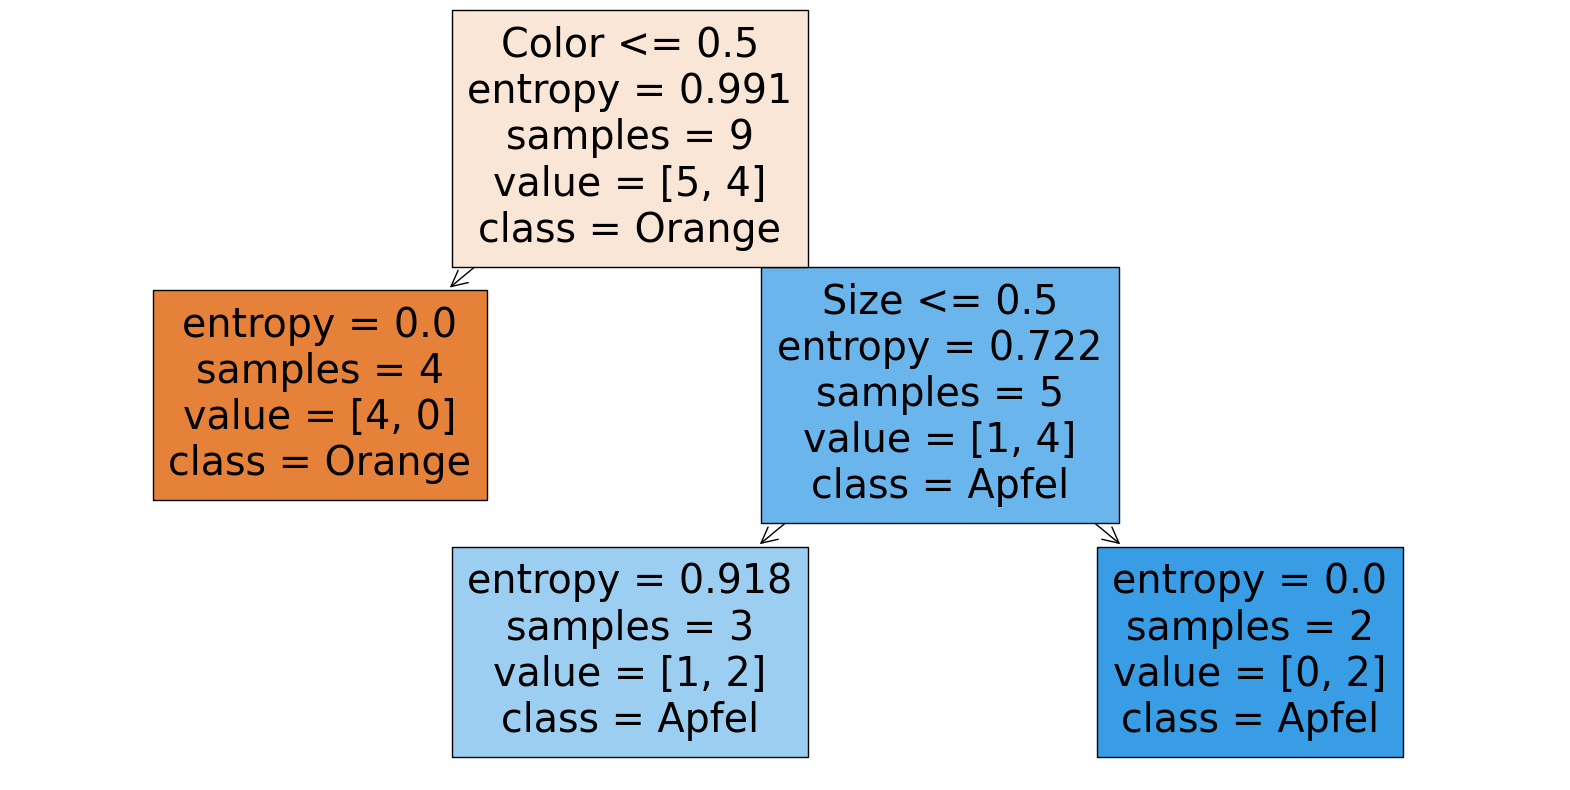

In [6]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=['Color','Size'], class_names=df_map_typ)
plt.show()

Mit der bekannten Methode `predict` können wir eine Vorhersage treffen. Also ein Objekt das Orange (0) ist und Klein (1) ist eine Orange (0).

In [7]:
clf.predict([[0,1]])

C:\Users\jpcwc\miniconda3\envs\lehre4\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

Prüfen wir das Modell einmal an dem uns bekannten Energie- und Wetterdatensatz. Wir laden den Datensatz und fügen eine Spalte für den Wochentag (gleich numerisch) hinzu und ob der `EV_HT_740`-Verbraucher an ist. Wir brauchen in diesem Fall die fehlenden `NaN` Werte nicht entfernen.

In [8]:
egywth = pd.read_csv("../data/UROS/Energy1D_weather_clean.csv", parse_dates=[0])
egywth["Weekday"] = egywth["Date"].dt.dayofweek
egywth["EV_HT_740_IS_ON"] = egywth.EV_HT_740==0

Wir wollen ein Modell für die Temperaturklasse und den Heiztage und Kühltage bestimmen, um zu sehen ob die originalen Grenzen aus dem Notebook zur [Datenvorverarbeitung](https://ml-book.ai4sc-lehre.auf.uni-rostock.de/lectures/07_Data_Cleaning.html#verwendung-von-np-where) erkannt werden. Hierfür wandeln wir die Spalten zuerst in Numerische Kategorien um.

In [9]:
egywth["TemperaturKlasseN"], TK_map = pd.factorize(egywth["TemperaturKlasse"])
egywth["HeizKuehlTageN"], HKT_map = pd.factorize(egywth["HeizKuehlTage"])
TK_map,HKT_map

(Index(['Cold', 'Cool', 'Mild', 'Warm'], dtype='object'),
 Index(['Heizgradtag', 'Normaltag', 'Kühlgradtag'], dtype='object'))

Dann trainieren und visualisieren wir die Entscheidungsbäume.

In [10]:
clfTK = DecisionTreeClassifier()
clfTK.fit(egywth[['TMK']], egywth[['TemperaturKlasseN']])
clfTK.get_depth()

3

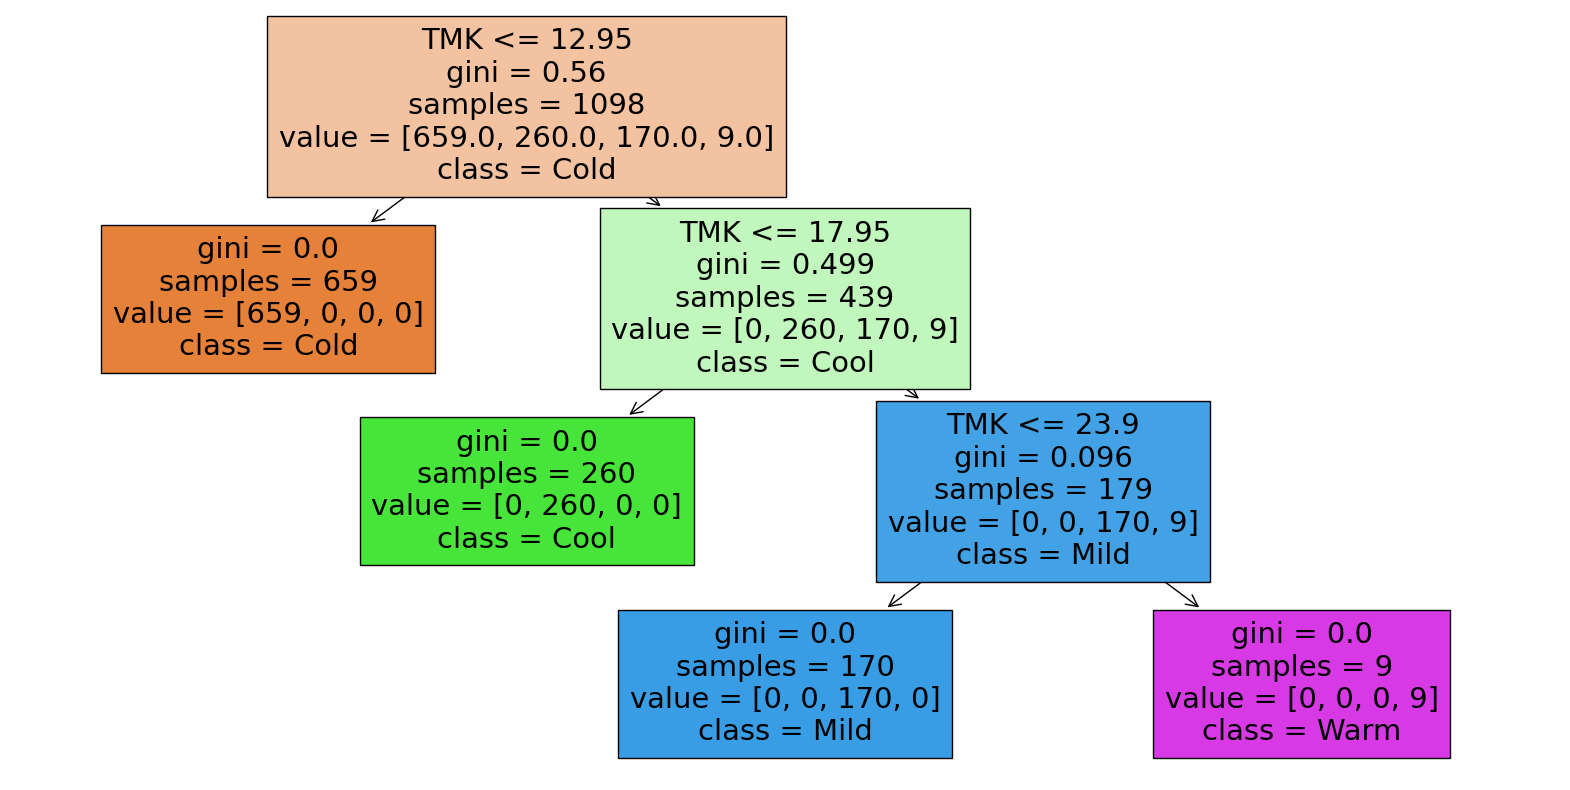

In [11]:
plt.figure(figsize=(20,10))
plot_tree(clfTK, filled=True, feature_names=['TMK'], class_names=TK_map)
plt.show()

In [12]:
clfHKT = DecisionTreeClassifier()
clfHKT.fit(egywth[['TMK']], egywth[['HeizKuehlTageN']])
clfHKT.get_depth()

2

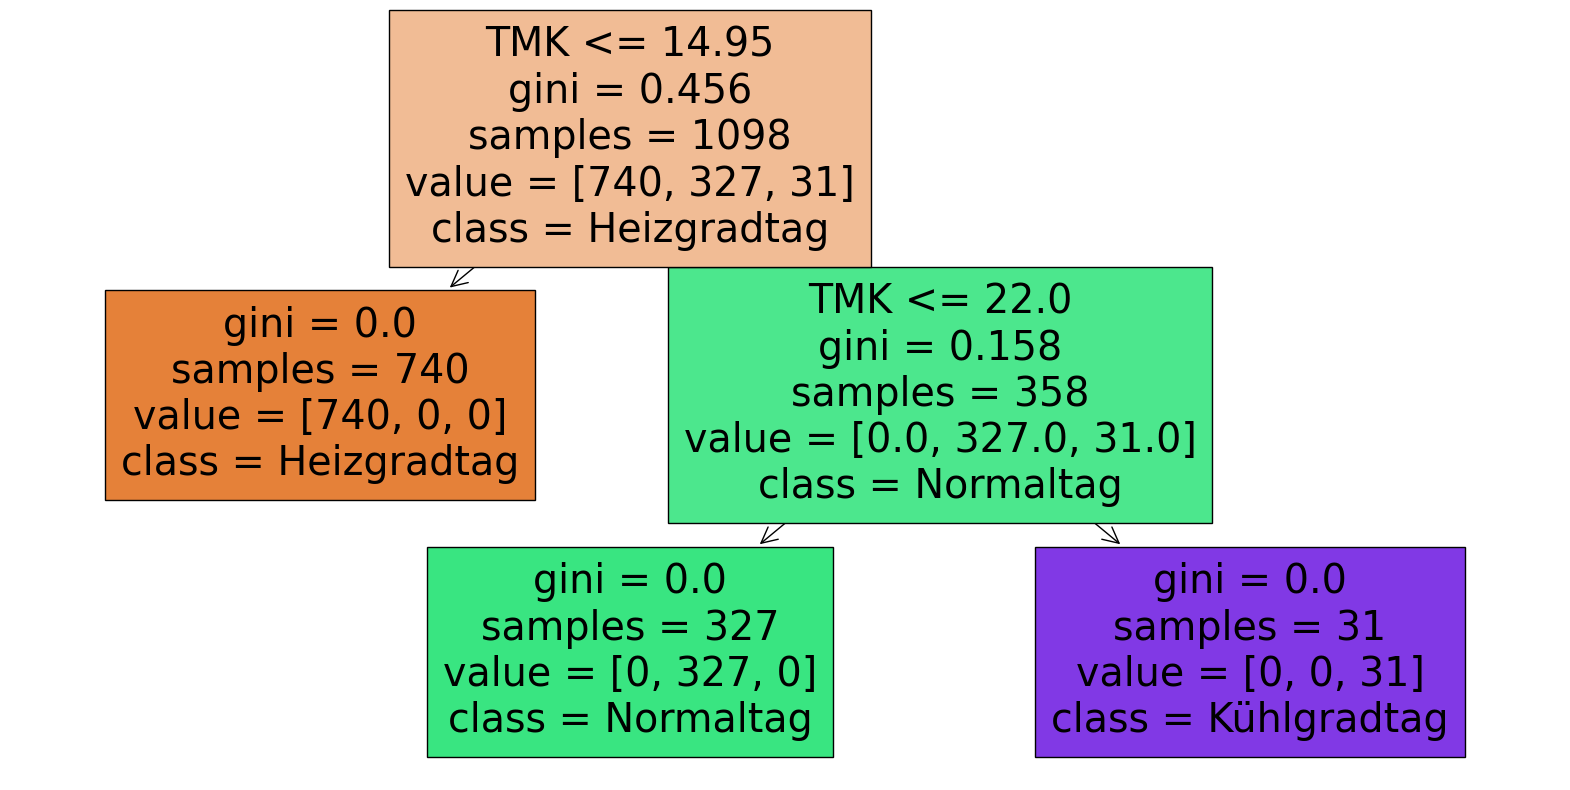

In [13]:
plt.figure(figsize=(20,10))
plot_tree(clfHKT, filled=True, feature_names=['TMK'], class_names=HKT_map)
plt.show()

Es zeigt sich, dass die originalen Grenzen und die Folge der Werte durchaus gut identifiziert werden, wenn auch nicht ganz präzise, da entsprechende Samples im Datensatz fehlen.

Trainieren wir einen Entscheidungsbaum für die Aktivität des `EV_HT_740`-Verbrauches, wie bei der logistischen Regression.

In [14]:
clfHT = DecisionTreeClassifier()
clfHT.fit(egywth[["SDK", "NM", "VPM", "TMK", "Weekday"]], egywth[['EV_HT_740_IS_ON']])
clfHT.get_depth()

21

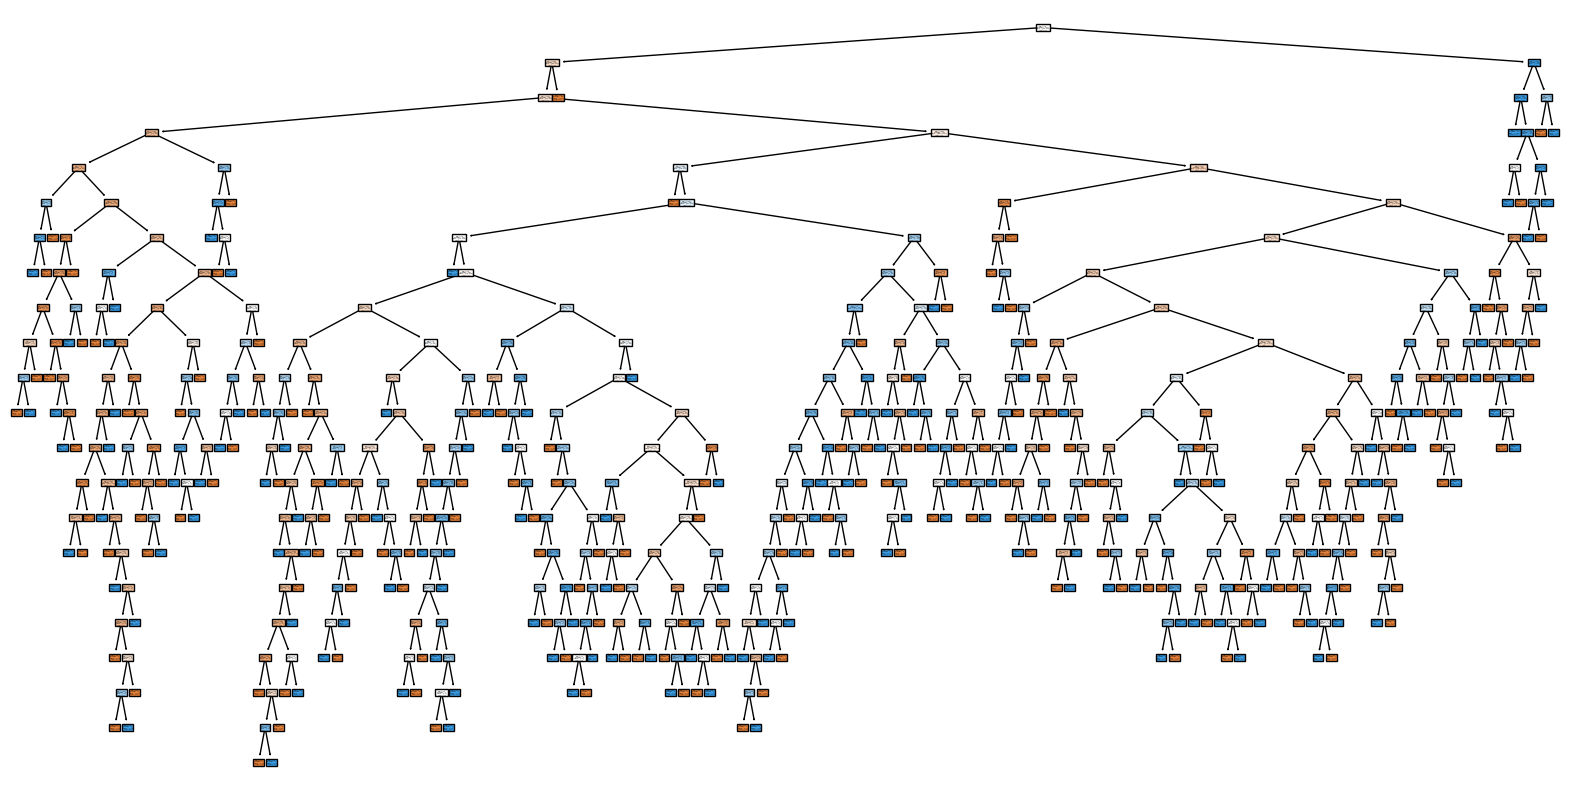

In [15]:
plt.figure(figsize=(20,10))
plot_tree(clfHT, filled=True, feature_names=["SDK", "NM", "VPM", "TMK", "Weekday"], class_names=['Off',"On"])
plt.show()

Das resultiert in einen deutlich komplexeren Entscheidungsbaum mit einer Tiefe von 21 Knoten. 

Prüfen wir einmal die Vorhersagequalität, indem wir den Trainingsdatensatz vorhersagen. 

In [16]:
egywth["pred_DT"] = clfHT.predict(egywth[["SDK", "NM", "VPM", "TMK", "Weekday"]])

Als Vergleichsmetriken für Entscheidungsbäume die kategorische Werte vorhersagen, verwendet man die Metriken, die wir für die [Logistische Regression](https://ml-book.ai4sc-lehre.auf.uni-rostock.de/lectures/10_Logistic_Regression.html#modellqualitat) diskutiert haben.

In [17]:
from sklearn.metrics import accuracy_score, f1_score

print('Accuracy: {:.2f}'.format(accuracy_score(egywth.EV_HT_740_IS_ON.values, egywth.pred_DT)))
print('F1-Score: {:.2f}'.format(f1_score(egywth.EV_HT_740_IS_ON, egywth.pred_DT)))

Accuracy: 1.00
F1-Score: 1.00


Hier zeigt sich, dass der Entscheidungsbaum den Ein/Aus-Zustand perfekt vorhersagen kann. Die Logistischen Regressionsmodelle im Vergleich erreichten nur eine Genauigkeit von 54% und 60%. 

<div class="alert alert-block alert-warning">
Es ist zu beachten, dass Modelle mit dieser perfekten Qualität meist nicht gewollt sind, da sie Überfitten (Overfitting) und dann nicht gut generalisieren. Generalisierung bedeutet, dass das Modell auch gut anwendbar auf neue Datensätze ist.
</div>

## Overfitting, Train-Test-Split und Kreuzvalidation

Um das Überfitting besser zu erkennen und die Generalisierbarkeit eines Modelles zu bewerten, verwendet man üblicherweise zur Bewertung und zum Vergleich von Modellen nicht einfach den Trainingsdatensatz, sondern teilt die Daten in einen Datensatz zum Trainieren und einem zum Testen (Train-Test-Split). Dabei darf der Testdatensatz keine Trainingsdaten enthalten.

Teilen wir den Datensatz einmal in einen Test- und einen Trainingsdatensatz mit jeweils 60% und 40% Daten auf und trainieren das Modell nur auf dem Trainingsdatensatz.

In [18]:
egywth_train=egywth.head(int(egywth.shape[0]*6/10)).copy()
egywth_test=egywth.tail(int(egywth.shape[0]*4/10)).copy()

In [19]:
clfHT_T = DecisionTreeClassifier()
clfHT_T.fit(egywth_train[["SDK", "NM", "VPM", "TMK", "Weekday"]], egywth_train[['EV_HT_740_IS_ON']])
clfHT_T.get_depth()

13

In [20]:
egywth_train["pred_DT"] = clfHT_T.predict(egywth_train[["SDK", "NM", "VPM", "TMK", "Weekday"]])
print('Train Accuracy: {:.2f}'.format(accuracy_score(egywth_train.EV_HT_740_IS_ON.values, egywth_train.pred_DT)))

Train Accuracy: 1.00


Wir erhalten wieder ein Modell, das zu 100% korrekt vorhersagt. 

Wenden wir das Modell einmal auf dem Testdatensatz an.

In [21]:
egywth_test["pred_DT"] = clfHT_T.predict(egywth_test[["SDK", "NM", "VPM", "TMK", "Weekday"]])
print('Test Accuracy: {:.2f}'.format(accuracy_score(egywth_test.EV_HT_740_IS_ON.values, egywth_test.pred_DT)))

Test Accuracy: 0.16


Wir sehen jetzt, dass das Modell auf einmal sehr schlecht ist mit einer Genauigkeit von nur 16% (wir bedenken, dass eine Zufallswahl bereits 50% Genauigkeit hat). Das Modell, das also im Training perfekt war, ist im Test komplett schlecht. Das liegt zum einen daran, dass wir in der Logistischen Regression bereits gesehen haben, dass der Energieverbrauch im hinteren Bereich nahezu immer aktiv ist, also der Testdatensatz nicht dem Trainingsdatensatz gut entspricht. Dadurch lernt das Modell ein Verhalten, das im Testdatensatz gar nicht mehr vorkommt. 

Dies können wir verhindern, indem wir die Trainings und Testdaten zufällig auswählen.

In [22]:
from sklearn.model_selection import train_test_split

egywthN=egywth.dropna()  # Wir entfernen hier wieder die NaN Werte, da einige Ensemble-Methoden keine NaN Werte unterstützen
egywth_train, egywth_test = train_test_split(egywthN, test_size=0.4)

In [23]:
clfHT_T = DecisionTreeClassifier()
clfHT_T.fit(egywth_train[["SDK", "NM", "VPM", "TMK", "Weekday"]], egywth_train[['EV_HT_740_IS_ON']])
clfHT_T.get_depth()

15

In [24]:
egywth_train["pred_DT"] = clfHT_T.predict(egywth_train[["SDK", "NM", "VPM", "TMK", "Weekday"]])
print('Train Accuracy: {:.2f}'.format(accuracy_score(egywth_train.EV_HT_740_IS_ON.values, egywth_train.pred_DT)))

Train Accuracy: 1.00


In [25]:
egywth_test["pred_DT"] = clfHT_T.predict(egywth_test[["SDK", "NM", "VPM", "TMK", "Weekday"]])
print('Test Accuracy: {:.2f}'.format(accuracy_score(egywth_test.EV_HT_740_IS_ON.values, egywth_test.pred_DT)))

Test Accuracy: 0.59


Um Abzusichern, dass man nicht zufällig ein guter Test- und Trainingsdatensatz auswählt, empfiehlt es sich das Sampling und Training mehrmals hintereinander zu wiederholen. Diese Verfahren nennt man $k$-Kreuzvalidation ($k$-Cross-Validation) wobei $k$ die Anzahl der Wiederholungen ist. Auch hierfür bietet `sklearn` eine vorhandene Unterstützungsfunktion an.

In [26]:
from sklearn.model_selection import cross_val_score

cross_val_score(clfHT_T, egywth_train[["SDK", "NM", "VPM", "TMK", "Weekday"]], egywth_train[['EV_HT_740_IS_ON']], cv=5)

array([0.69090909, 0.52727273, 0.58181818, 0.60909091, 0.62385321])

Hier sehen, wir das trotz der Zufallsauswahl das für die Trainingsdaten ideale Modell immer noch nicht gut die Testdaten vorhersagen kann, es also nicht nur daran liegt, das nicht genug Daten verfügbar sind, sondern, das overfitted Modell einfach sich relativ schlecht generalisieren lässt. Das ist eine typische Eigenschaft von Entscheidungsbäumen.

Das Problem lässt sich reduzieren, wenn man die Tiefe der Bäume reduziert.

In [27]:
clfHT_T2 = DecisionTreeClassifier(max_depth=10)
clfHT_T2.fit(egywth_train[["SDK", "NM", "VPM", "TMK", "Weekday"]], egywth_train[['EV_HT_740_IS_ON']])
clfHT_T2.get_depth()

10

In [28]:
egywth_train["pred_DT2"] = clfHT_T2.predict(egywth_train[["SDK", "NM", "VPM", "TMK", "Weekday"]])
print('Train Accuracy: {:.2f}'.format(accuracy_score(egywth_train.EV_HT_740_IS_ON.values, egywth_train.pred_DT2)))

Train Accuracy: 0.92


In [29]:
egywth_test["pred_DT2"] = clfHT_T2.predict(egywth_test[["SDK", "NM", "VPM", "TMK", "Weekday"]])
print('Test Accuracy: {:.2f}'.format(accuracy_score(egywth_test.EV_HT_740_IS_ON.values, egywth_test.pred_DT2)))

Test Accuracy: 0.58


Dadurch wird zwar die Qualität des Modells auf dem Trainingsdatensatz schlechter, aber überraschenderweise steigt meist die Qualität auf dem Testdatensatz.

## Kombinationsmodelle (Ensemble Models)

Wir haben am obigen Beispiel gesehen, dass Entscheidungsbäume stark zu Overfitting neigen. Deshalb hat man verschiedene Modellvarianten entwickelt, welche die Generalisierbarkeit und somit Gesamtgenauigkeit verbessern, aber die Vorteile des einfachen Modellkonzeptes beibehalten. 

Diese Modellvarianten nutzen die Idee mehrere einfache Modelle zu kombinieren. Sie werden als _Ensemble-Modells_ bezeichnet. Das Hauptziel von Ensemble-Modellen ist es, die Vorhersagegenauigkeit zu erhöhen und die Schwächen einzelner Modelle zu kompensieren (wie Overfitting), da durch die Kombination mehrerer Modelle tendenziell die Varianz reduziert wird. Der Nachteil von Ensemble-Modellen ist der erhöhte Rechenbedarfs. Insbesondere beim Stacking und Voting werden vollständige Modelle trainiert, wodurch der Rechenaufwand steigt.

Es gibt verschiedene Ansätze zur Erstellung von Ensemble-Modellen, die sich in der Art und Weise unterscheiden, wie die einzelnen Modelle kombiniert werden:

- **Bagging (Bootstrap Aggregation):** Mehrere Modelle werden unabhängig voneinander auf verschiedenen Stichproben des Trainingsdatensatzes trainiert, die durch Ziehen mit Zurücklegen (Bootstrap-Sampling) erzeugt werden.
- **Boosting:** Modelle werden sequenziell trainiert, wobei jedes neue Modell darauf abzielt, die Fehler der vorherigen Modelle zu korrigieren. Jedes Modell wird somit fokussierter und trägt dazu bei, die Gesamtleistung zu verbessern.
- **Stacking:**  Mehrere Modelle unterschiedlichen Typs (Basislerner) werden parallel trainiert um ihre Stärken zu kombinieren. Dieses Metamodell lernt, die Vorhersagen der Basislerner zu kombinieren, um eine endgültige Vorhersage zu treffen.
- **Voting:** Die Vorhersagen mehrerer Modelle werden kombiniert, indem über die Vorhersagen abgestimmt wird. Für Klassifikationsprobleme kann dies Mehrheitsabstimmung (die Klasse mit den meisten Stimmen wird ausgewählt) sein, während für Regressionsprobleme eine Mittelung der Vorhersagen vorgenommen werden kann.

### Bagging/Bootstrap - Random Forest

Random Forests ist eine der beliebtesten Ensemble-Modelle. Es ist eine Bagging-Variante eines Entscheidungsbaumes, bei dem mehrere kleinere Bäume auf zufällige Ausschnitte des Datensatzes trainiert, dadurch soll das Overfitting vermieden werden und somit die Genauigkeit bei der Generalisierung verbessert werden. Wir können uns prinzipiell einen Random Forest selbst aus einzelnen Entscheidungsbäumen erstellen.

In [30]:
forest=[]
for i in range(50):
    egywth_train_sub=egywth_train.sample(int(0.2*egywth_train.shape[0]))
    tree = DecisionTreeClassifier(max_depth=4)
    tree.fit(egywth_train_sub[["SDK", "NM", "VPM", "TMK", "Weekday"]], egywth_train_sub.EV_HT_740_IS_ON.values)
    forest.append(tree)

Wir sehen, dass die einzelnen Bäume kleiner sind, da sie einzeln weniger Fälle modellieren müssen.

Zur Vorhersage berechnen wir das Mehrheitsvotum der Vorhersage aller Bäume bei diskreten Daten und den Mittelwert der Vorhersage der einzelnen Bäume bei numerischen Daten bei Regressionsmodellen.

In [31]:
pred=np.zeros(egywth_train.shape[0])
for tree in forest:
    pred += tree.predict(egywth_train[["SDK", "NM", "VPM", "TMK", "Weekday"]]).astype(int)
egywth_train['pred_forest']= pred > len(forest)/2 # da dies eine binäre vorhersage ist berechnen wir den Mehreitsvote

print('Train Accuracy: {:.2f}'.format(accuracy_score(egywth_train.EV_HT_740_IS_ON.values, egywth_train.pred_forest)))

Train Accuracy: 0.67


In [32]:
pred=np.zeros(egywth_test.shape[0])
for tree in forest:
    pred += tree.predict(egywth_test[["SDK", "NM", "VPM", "TMK", "Weekday"]])
egywth_test['pred_forest']= pred > len(forest)/2 # Mehreitsvote

print('Test Accuracy: {:.2f}'.format(accuracy_score(egywth_test.EV_HT_740_IS_ON.values, egywth_test.pred_forest)))

Test Accuracy: 0.59


In der Praxis nutzt man den fertigen Wald aus `sklearn.ensemble`, welche standartmäßig mit 100 Bäumen arbeitet.

In [33]:
from sklearn.ensemble import RandomForestClassifier
clf_RF = RandomForestClassifier()
clf_RF.fit(egywth_train[["SDK", "NM", "VPM", "TMK", "Weekday"]], egywth_train.EV_HT_740_IS_ON.values)

RandomForestClassifier()

Mit der bekannten Predict Methode.

In [34]:
egywth_train["pred_RF"] = clf_RF.predict(egywth_train[["SDK", "NM", "VPM", "TMK", "Weekday"]])
print('Train Accuracy: {:.2f}'.format(accuracy_score(egywth_train.EV_HT_740_IS_ON.values, egywth_train.pred_RF)))

Train Accuracy: 1.00


In [35]:
egywth_test["pred_RF"] = clf_RF.predict(egywth_test[["SDK", "NM", "VPM", "TMK", "Weekday"]])
print('Test Accuracy: {:.2f}'.format(accuracy_score(egywth_test.EV_HT_740_IS_ON.values, egywth_test.pred_RF)))

Test Accuracy: 0.59


Das Ergebnis ist schon besser als der einfache Entscheidungsbaum.

### Boosting

Boosting ist eine andere Methode zum Erstellen von Ensemble-Modellen, bei der eine Reihe schwacher Modelle (d. h. Modelle, die nur geringfügig besser als Zufallsvorhersagen sind) sequenziell trainiert und kombiniert werden, um ein starkes Modell zu erstellen. Die Grundidee besteht darin, aufeinanderfolgende Modelle so zu trainieren, dass sie die Fehler der vorhergehenden Modelle korrigieren.

<div class="alert alert-block alert-warning">
Aber Achtung: Da Boosting-Algorithmen stark auf schwerwiegende Fehler fokussieren, können sie empfindlich gegenüber Ausreißern sein.
</div>

#### Adaboost

_AdaBoost_ ist eines der bekanntesten boosting Modelle. Es beginnt mit einem schwachen Modell, das auf den gesamten Datensatz trainiert wird. In den folgenden Iterationen werden die Gewichte der falsch klassifizierten Datenpunkte erhöht und ein neues Modell wird trainiert. Dies wiederholt sich, und die Modelle werden so kombiniert, dass sie schwerwiegendere Fehler korrigieren. AdaBoost ist einfach zu implementieren und funktioniert gut mit vielen Basislernern, wie Entscheidungsstümpfen (einfachen Entscheidungsbäumen).

In [36]:
from sklearn.ensemble import AdaBoostClassifier
clf_AB = AdaBoostClassifier()
clf_AB.fit(egywth_train[["SDK", "NM", "VPM", "TMK", "Weekday"]], egywth_train.EV_HT_740_IS_ON.values)

C:\Users\jpcwc\miniconda3\envs\lehre4\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

In [37]:
egywth_train["pred_AB"] = clf_AB.predict(egywth_train[["SDK", "NM", "VPM", "TMK", "Weekday"]])
print('Train Accuracy: {:.2f}'.format(accuracy_score(egywth_train.EV_HT_740_IS_ON.values, egywth_train.pred_AB)))

Train Accuracy: 0.75


In [38]:
egywth_test["pred_AB"] = clf_AB.predict(egywth_test[["SDK", "NM", "VPM", "TMK", "Weekday"]])
print('Test Accuracy: {:.2f}'.format(accuracy_score(egywth_test.EV_HT_740_IS_ON.values, egywth_test.pred_AB)))

Test Accuracy: 0.62


#### Gradient Boosting

_Gradient Boosting_ optimiert ein beliebiges Verlustmaß (z. B. die quadratische Fehlerfunktion bei Regression oder die logarithmische Verlustfunktion bei Klassifikation) durch iteratives Hinzufügen von Modellen, die die negativen Gradienten (Richtungen des steilsten Abstiegs) der Verlustfunktion vorhersagen. Gradient Boosting ist flexibler und leistungsfähiger als AdaBoost, da es eine bessere Optimierung des Verlustmaßes ermöglicht.

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
clf_GB = GradientBoostingClassifier()
clf_GB.fit(egywth_train[["SDK", "NM", "VPM", "TMK", "Weekday"]], egywth_train.EV_HT_740_IS_ON.values)

egywth_train["pred_GB"] = clf_GB.predict(egywth_train[["SDK", "NM", "VPM", "TMK", "Weekday"]])
print('Train Accuracy: {:.2f}'.format(accuracy_score(egywth_train.EV_HT_740_IS_ON.values, egywth_train.pred_GB)))

Train Accuracy: 0.87


In [40]:
egywth_test["pred_GB"] = clf_GB.predict(egywth_test[["SDK", "NM", "VPM", "TMK", "Weekday"]])
print('Test Accuracy: {:.2f}'.format(accuracy_score(egywth_test.EV_HT_740_IS_ON.values, egywth_test.pred_GB)))

Test Accuracy: 0.62


#### XGBoost

_XGBoost_ ist eine erweiterte Version des Gradient Boosting, die auf Effizienz und Geschwindigkeit optimiert ist. Es verwendet Techniken wie Sparsity Awareness, paralleles Tree-Boosting und reguläre Begriffe, um Overfitting zu vermeiden. XGBoost ist sehr beliebt bei großen Datensätzen aufgrund seiner hohen Leistung und Effizienz.

XGBoost ist direkt nicht in `sklearn` verfügbar. Das `xgboost` bietet aber die gleiche API an.

In [41]:
import xgboost as xgb

clf_XGB = xgb.XGBClassifier()
clf_XGB.fit(egywth_train[["SDK", "NM", "VPM", "TMK", "Weekday"]], egywth_train.EV_HT_740_IS_ON.values)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [42]:
egywth_train["pred_XGB"] = clf_XGB.predict(egywth_train[["SDK", "NM", "VPM", "TMK", "Weekday"]])
print('Train Accuracy: {:.2f}'.format(accuracy_score(egywth_train.EV_HT_740_IS_ON.values, egywth_train.pred_XGB)))

Train Accuracy: 1.00


In [43]:
egywth_test["pred_XGB"] = clf_XGB.predict(egywth_test[["SDK", "NM", "VPM", "TMK", "Weekday"]])
print('Accuracy: {:.2f}'.format(accuracy_score(egywth_test.EV_HT_740_IS_ON.values, egywth_test.pred_XGB)))

Accuracy: 0.60


### Stacking

Beim Stacking kombiniert man einfach mehrere Modelle durch ein weiteres einfaches Modell. Zum Beispiel wollen wir die Vorhersage des Logistischen Regressionsmodells mit dem Decission Tree kombinieren innerhalb eines weiteren Logistischen Modells kombinieren. Hier können wir insbesondere gut ausnutzen, dass `sklearn` immer die gleiche API anbietet, wir können also das Training und die Vorhersage einfach als Loop implementieren.

In [44]:
from sklearn.linear_model import LogisticRegression

# 1. Basismodel
clfLR = LogisticRegression()
# 2. Basismodel 
clfDT = DecisionTreeClassifier()
# Stacking
stack=[clfLR, clfDT]

Wir trainineren alle Basismodelle

In [45]:
for model in stack:
    model.fit(egywth_train[["SDK", "NM", "VPM", "TMK", "Weekday"]], egywth_train.EV_HT_740_IS_ON.values)

Die Modelle kombinieren wir nun in einem Stackingmodell, was meist ein sehr einfaches logistisches oder lineares Modell ist. Hierfür berechnen wir erst für den Trainingsdatensatz die Vorhersagen und geben die in ein neues gestacktes Modell, das nur die Vorhersagen enthält. Dadurch gewichten wir einfach die Basismodelle in ihrer Güte.

In [46]:
pred_train={}
for i,model in enumerate(stack):
    pred_train[f"pred{i}"]=model.predict(egywth_train[["SDK", "NM", "VPM", "TMK", "Weekday"]])
pred_train=pd.DataFrame(pred_train)

In [47]:
# 4. Stacking Model
clfST = LogisticRegression()
clfST.fit(pred_train, egywth_train.EV_HT_740_IS_ON.values)

LogisticRegression()

Bei der Vorhersage machen wir das gleiche und berechnen erst die Vorhersage der Basismodell und kombinieren dann diese in einer Vorhersage durch das Stackingmodell.

In [48]:
pred_test={}
for i,model in enumerate(stack):
    pred_test[f"pred{i}"]=model.predict(egywth_test[["SDK", "NM", "VPM", "TMK", "Weekday"]])
pred_test=pd.DataFrame(pred_test)
egywth_test['pred_stack_lm']= clfST.predict(pred_test)

print('Test Accuracy: {:.2f}'.format(accuracy_score(egywth_test.EV_HT_740_IS_ON.values, egywth_test.pred_stack_lm)))

Test Accuracy: 0.58


Auch hierfür bietet `sklearn` eine einfache Funktion an. Anstatt eines Mehrheitsvotums kombinieren wir die einzelnen Modelle hier allerdings mit einem Logistischen Modell, wodurch die Modelle in ihrer Qualität gewichtet werden und das Gesamtergebnis besser wird.

In [49]:
from sklearn.ensemble import StackingClassifier

clf_STK = StackingClassifier(estimators=[('lr', LogisticRegression()),('dt',DecisionTreeClassifier())], final_estimator=LogisticRegression())
clf_STK.fit(egywth_train[["SDK", "NM", "VPM", "TMK", "Weekday"]], egywth_train.EV_HT_740_IS_ON.values)

StackingClassifier(estimators=[('lr', LogisticRegression()),
                               ('dt', DecisionTreeClassifier())],
                   final_estimator=LogisticRegression())

In [50]:
egywth_train["pred_STK"] = clf_STK.predict(egywth_train[["SDK", "NM", "VPM", "TMK", "Weekday"]])
print('Train Accuracy: {:.2f}'.format(accuracy_score(egywth_train.EV_HT_740_IS_ON.values, egywth_train.pred_STK)))

Train Accuracy: 0.86


In [51]:
egywth_test["pred_STK"] = clf_STK.predict(egywth_test[["SDK", "NM", "VPM", "TMK", "Weekday"]])
print('Test Accuracy: {:.2f}'.format(accuracy_score(egywth_test.EV_HT_740_IS_ON.values, egywth_test.pred_STK)))

Test Accuracy: 0.58


### Voting

Beim Voting kombinieren wir mehrere Basismodelle durch Mehrheitsabstimmung oder Median/Mittelwertbestimmung.

Wir können zum Beispiel die Basismodelle aus dem Stacking durch Mehrheitsabstimmung kombinieren.

In [52]:
pred=np.zeros(egywth_test.shape[0])
for model in stack:
    pred += model.predict(egywth_test[["SDK", "NM", "VPM", "TMK", "Weekday"]])
egywth_test['pred_stack_vote']= pred > len(forest)/2 # Mehreitsvote

print('Test Accuracy: {:.2f}'.format(accuracy_score(egywth_test.EV_HT_740_IS_ON.values, egywth_test.pred_stack_vote)))

Test Accuracy: 0.45


Auch hierfür bietet `sklearn` eine Methode an.

In [53]:
from sklearn.ensemble import VotingClassifier
clf_VK = VotingClassifier(estimators=[('lr', LogisticRegression()),('dt',DecisionTreeClassifier())], voting='hard')
clf_VK.fit(egywth_train[["SDK", "NM", "VPM", "TMK", "Weekday"]], egywth_train.EV_HT_740_IS_ON.values)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier())])

In [54]:
egywth_train["pred_VK"] = clf_VK.predict(egywth_train[["SDK", "NM", "VPM", "TMK", "Weekday"]])
print('Train Accuracy: {:.2f}'.format(accuracy_score(egywth_train.EV_HT_740_IS_ON.values, egywth_train.pred_VK)))

Train Accuracy: 0.85


In [55]:
egywth_test["pred_VK"] = clf_VK.predict(egywth_test[["SDK", "NM", "VPM", "TMK", "Weekday"]])
print('Test Accuracy: {:.2f}'.format(accuracy_score(egywth_test.EV_HT_740_IS_ON.values, egywth_test.pred_VK)))

Test Accuracy: 0.59


## Support Vector Machines

Support Vector Machines (SVMs) sind ein weiteres Modell, das zur Klassifikation und Regression verwendet werden kann. Sie sind besonders gut geeignet für Aufgaben, bei denen die Datenpunkte durch eine nichtlineare Entscheidungsgrenze getrennt werden können (Bei linearen Grenzen kann man logistische Modelle nutzen, bei scharfen Grenzen Entscheidungsbäume). SVM zielt darauf ab, die beste Trennlinie (oder Hyperebene in höheren Dimensionen) zu finden, die die Datenpunkte verschiedener Klassen mit maximalem Abstand trennen.

### Lineare SVM

Für ein einfaches binäres Klassifizierungsproblem mit zwei Klassen $ y_i \in \{-1, 1\} $ und Datenpunkten $ \bar{x}_i \in \mathbb{R}^n $, suchen wir eine Hyperebene, die die Daten trennt. Bei linearen SVM wir diese Hyperebene durch ein lineares Modell beschrieben:

$$
b + \bar{w} \cdot \bar{x}= 0
$$

Dabei ist $ \bar{w} $ der Normalenvektor zur Hyperebene und $b$ ist der Bias (Verschiebungsterm). Damit sind lineare Kernel dem logistischen Regressionsmodell sehr ähnlich und zeigt eine ähnliche lineare Entscheidungsgrenze.

Der Hyperebene teilt den Raum so, dass das Vorzeichen 
- positiv ist mit $b + \bar{w} \cdot \bar x_i \geq 0$ für $y_i=1$
- negativ ist mit $b + \bar{w} \cdot \bar x_i \lt 0$ für $y_i=-1$

Der Abstand zwischen den beiden nächsten Punkten beider Klassen (die als Support Vectors bezeichnet werden) und dem Hyperebene wird als Margin bezeichnet. Die SVM maximiert diese Margin, was gleichbedeutend mit der Minimierung von $|\bar{w}|$ ist. Die Optimierungsaufgabe lautet daher:

$$
\min_{\bar{w}, b} \frac{1}{2} \|\bar{w}\|^2
$$

unter den Nebenbedingungen

$$
\quad y_i (b + \bar{w} \cdot \bar{x}_i) \geq 1, \, \forall i.
$$

### Der Kerneltrick bei nicht-lineare SVM

Für nicht-lineare Probleme können wir die Datenpunkte in einen höherdimensionalen Raum transformieren, wo sie linear trennbar sind, so dass wir dort weiterhin ein Lineares Model nutzen können. Diese Transformation wird durch den sogenannten _Kerneltrick_ erreicht. Ein Kernel ist eine Funktion $ K(\bar{x}_i, \bar{x}_j) $, die das Skalarprodukt der Datenpunkte im höherdimensionalen Raum berechnet, ohne dass die Transformation explizit durchgeführt werden muss. Beliebte Kernelfunktionen sind:

- Linearkern: $ K(\bar{x}_i, \bar{x}_j) = \bar{x}_i \cdot \bar{x}_j $
- Polynomkern: $ K(\bar{x}_i, \bar{x}_j) = (\bar{x}_i \cdot \bar{x}_j + 1)^d $
- RBF-Kern (Radial Basis Function): $ K(\bar{x}_i, \bar{x}_j) = \exp(-\gamma \|\bar{x}_i - \bar{x}_j\|^2) $

Damit ist der Kernel vom Prinzip vergleichbar mit der Transferfunktion in einem GAM-Model, mit dem Unterschied, dass der Kernel das Skalarprodukt transformiert.

Um den Kernelfunktionen Rechnung zu tragen, ändert sich das Optimierungsproblem zu:

$$
\min_{\bar{w}, b} \frac{1}{2} \|\bar{w}\|^2 + C \sum_{i=1}^n \xi_i 
$$

unter den Nebenbedingungen

$$
y_i (b + \bar{w} \cdot \phi( b + \bar{x}_i)) \geq 1 - \xi_i, \, \xi_i \geq 0, \, \forall i
$$

Dabei ist $ \phi(\bar{x}) $ die Abbildung in den höheren dimensionsunabhängigen Raum und $ \xi_i $ sind die Schlupfvariablen. Diese sind notwendig, um bei nicht vollständig linear trennbaren Daten, die Fehlklassifikationen zu modellieren (gleich dem Fehlerterm $\varepsilon$).

Das Optimierungsproblems wird als _Duales Problem_ gelöst. Die duale Formulierung ermöglicht es, die Berechnungen nur in Form von Skalarprodukten (oder Kernelfunktionen) durchzuführen:

$$
\max_{\alpha} \sum_{i=1}^n \alpha_i - \frac{1}{2} \sum_{i=1}^n \sum_{j=1}^n \alpha_i \alpha_j y_i y_j K(\bar{x}_i, \bar{x}_j)
$$

mit den Lagrange-Multiplikatoren  $ \alpha_i $ und unter den Nebenbedingungen

$$
\quad 0 \leq \alpha_i \leq C, \, \sum_{i=1}^n \alpha_i y_i = 0.
$$

Die Entscheidungsfunktion im Dualraum wird durch die Lagrange-Multiplikatoren und Kernelfunktion ausgedrückt:

$$
\bar y = \text{sign}\left( b + \sum_{i=1}^n \alpha_i y_i K(\bar{x}_i, \bar{x}) \right).
$$

### SVM in SciKit

Wir betrachten als illustratives Beispiel einmal ein zufällig erzeugtes Yin-Yang-Muster. Dies ist ein 2D-Datensatz, bei dem verschiedene Punkte unterschiedlich eingefärbt sind,
und die Aufgabe besteht darin, die richtige Farbe basierend auf dem Punkt zu vorhersagen. Es handelt sich also um eine grundlegendes Klassifikationsproblem. Um die Aufgabe jedoch hinreichend komplex zu gestalten, führen wir die Farben in einem Spiralmuster ein. Wir erstellen die Daten wie folgt:

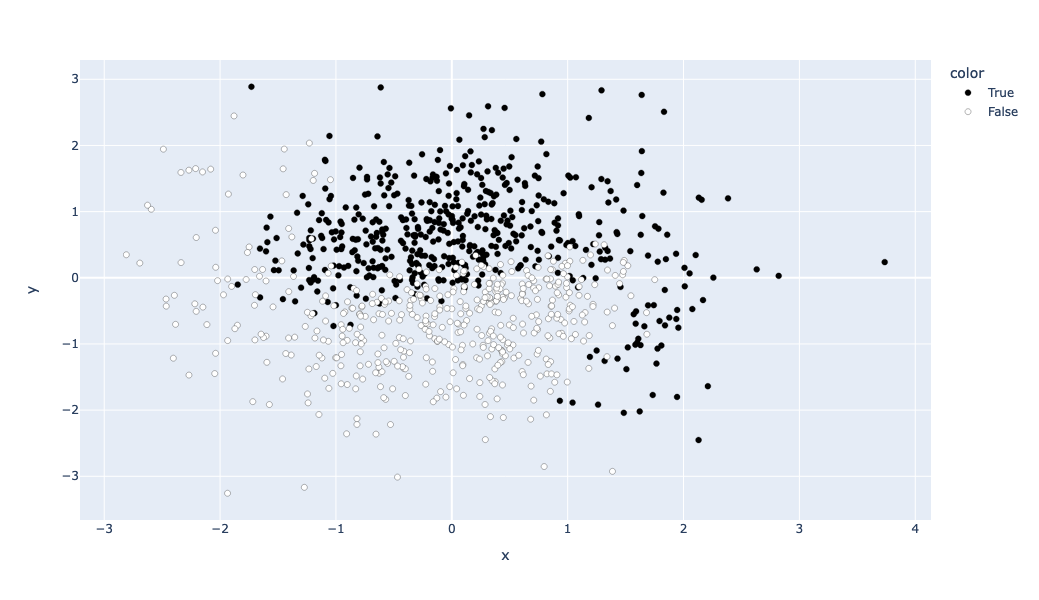

In [56]:
import plotly.express as px

np.random.seed(33)
N = 1000  # Anzahl der Punkte
X1 = np.random.normal(size=N)
X2 = np.random.normal(size=N)
X = np.column_stack((X1, X2))
y = X1 + X2 - 1.7*np.sin(1.2*(X1 - X2)) + np.random.normal(scale=0.5, size=N) > 0

fig=px.scatter(x=X1, y=X2, color=y, width=600, height=600, color_discrete_sequence=["black", "white"])
fig.update_traces(marker_line=dict(width=.3, color="black"))
fig.show()

Das Bild zeigt weiße und schwarze Punkte, die ein unvollkommenes Yin-Yang-Muster mit einer unscharfen Grenze zwischen den Klassen bilden.

Der SVM-Klassifikator `SVC` ist im Paket `sklearn.svm` implementiert. Der Konstruktor der Klasse akzeptiert eine Anzahl von Argumenten, von denen die wichtigsten `kernel` sind, um verschiedene Kernel auszuwählen, sowie die entsprechenden Parameter für verschiedene Kernel, z.B. `degree` für den Polynomgrad und `gamma` für den radialen Skalierungsparameter.

Die Erstellung, das Fitting und Scoring des Modells folgen dem bekannten Muster

In [57]:
from sklearn.svm import SVC

m = SVC(kernel="linear")
_ = m.fit(X, y)
m.score(X, y)  # on training data

0.82

Wir erstellen uns eine Visualisierungsfunktion, um die Grenzen besser zu erkennen.

In [58]:
def DBPlot(m, X, y, nGrid = 100):
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, nGrid), 
                           np.linspace(x2_min, x2_max, nGrid))
    XX = np.column_stack((xx1.ravel(), xx2.ravel()))
    hatyy = m.predict(XX).reshape(xx1.shape)
    fig = px.imshow(hatyy, width=600, height=600)
    fig.add_scatter(x=X[:,0]/(x1_max-x1_min)*100+50, y=X[:,1]/(x2_max-x2_min)*100+50, mode="markers", 
        marker=dict(color='white', line=dict(width=.3, color="black")))
    fig.add_scatter(x=X[y,0]/(x1_max-x1_min)*100+50, y=X[y,1]/(x2_max-x2_min)*100+50, mode="markers", 
        marker=dict(color='black'))
    fig.update_coloraxes(showscale=False)
    fig.update_layout(showlegend=False)
    fig.show()

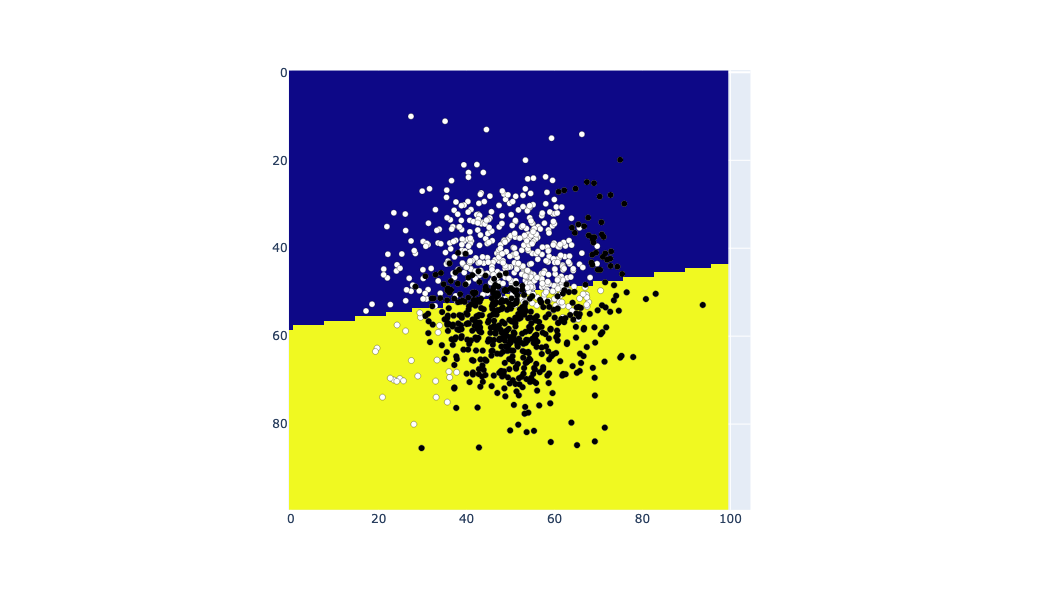

In [59]:
m = SVC(kernel="linear")  # linear kernel does not have important parameters
_ = m.fit(X, y)
DBPlot(m, X, y)

Das Ergebnis ist nicht zu schlecht - es erfasst den groben Unterschied der weißen und schwarzen Punkte, aber kann nicht den Kopf des Yin und Yangs modellieren.

Als nächstes wollen wir dies mit einem Polynomkern zweiten Grades probieren.

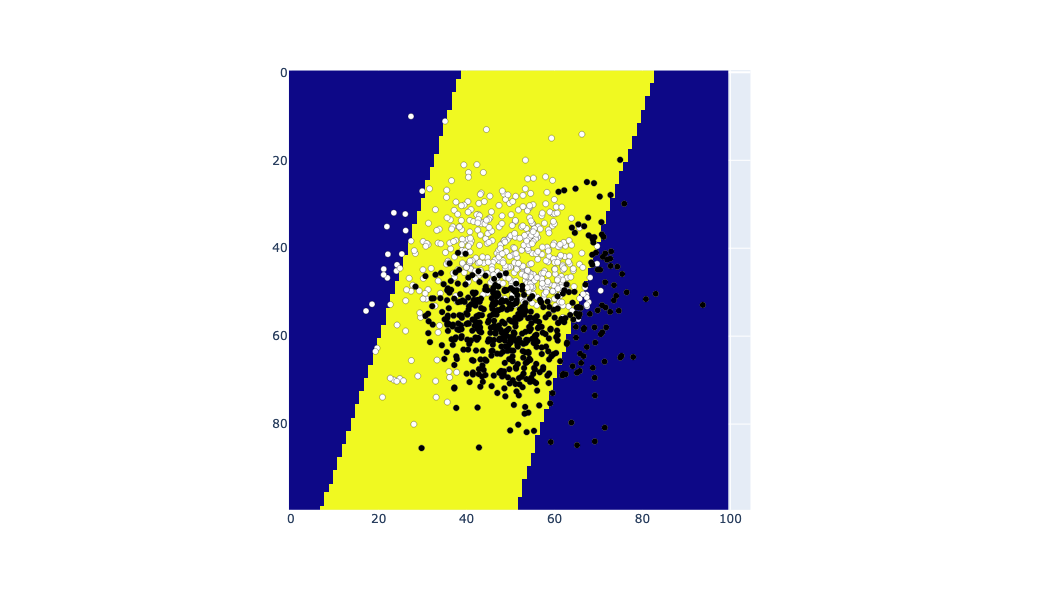

0.516

In [60]:
m = SVC(kernel="poly", degree=2)
_ = m.fit(X, y)
DBPlot(m, X, y)
m.score(X, y)

Wie Sie sehen können, ist der Polynomkern (2) in der Lage, ein blaues Band auf einem gelben Hintergrund darzustellen. Es ist fraglich, ob dies besser ist als das, was der lineare Kern leisten kann, aber man kann leicht erkennen, dass ein solches Band eine gute Darstellung für andere Arten von Daten wäre.

Als nächstes, repliziere das oben Genannte mit einem Grad-3-Kernel:

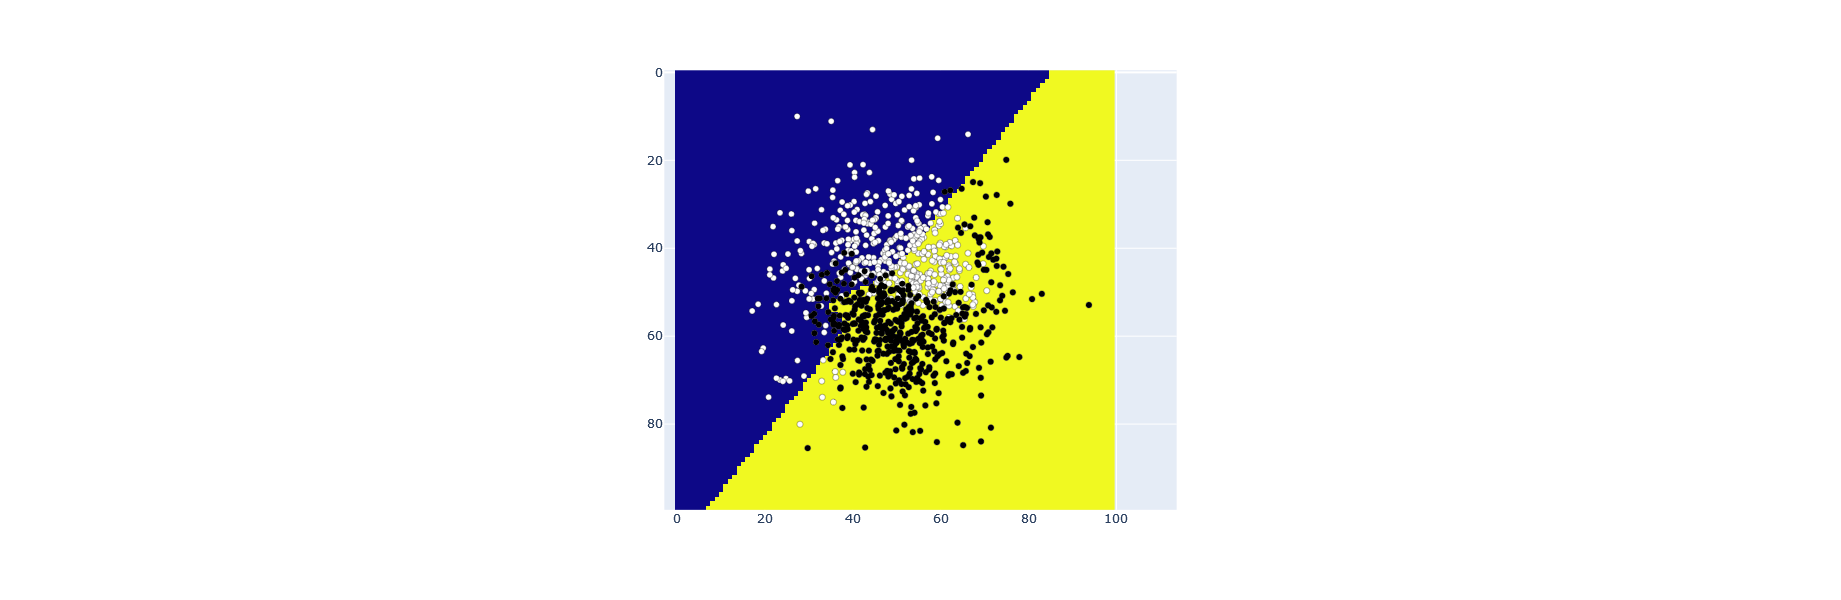

0.727

In [61]:
m = SVC(kernel="poly", degree=3)
_ = m.fit(X, y)
DBPlot(m, X, y)
m.score(X, y)

Und schließlich mit einem radialen Kernel:

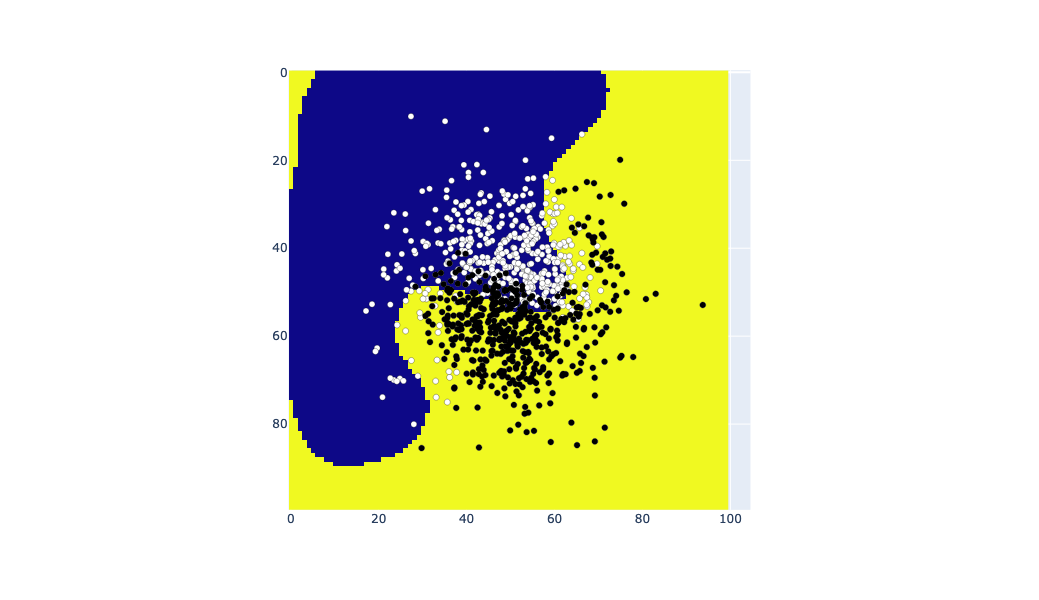

0.907

In [62]:
m = SVC(kernel="rbf", gamma=1)
_ = m.fit(X, y)
DBPlot(m, X, y)
m.score(X, y)

Vergleichen wir diese mit den Entscheidungsbäumen und Ensamble-Modellen so sehen wir, dass diese den Trainingsdatensatz inklusiver der Ausnahmen gut erlernen, dadurch allerdings keine stetigen Grenzen erkennen.

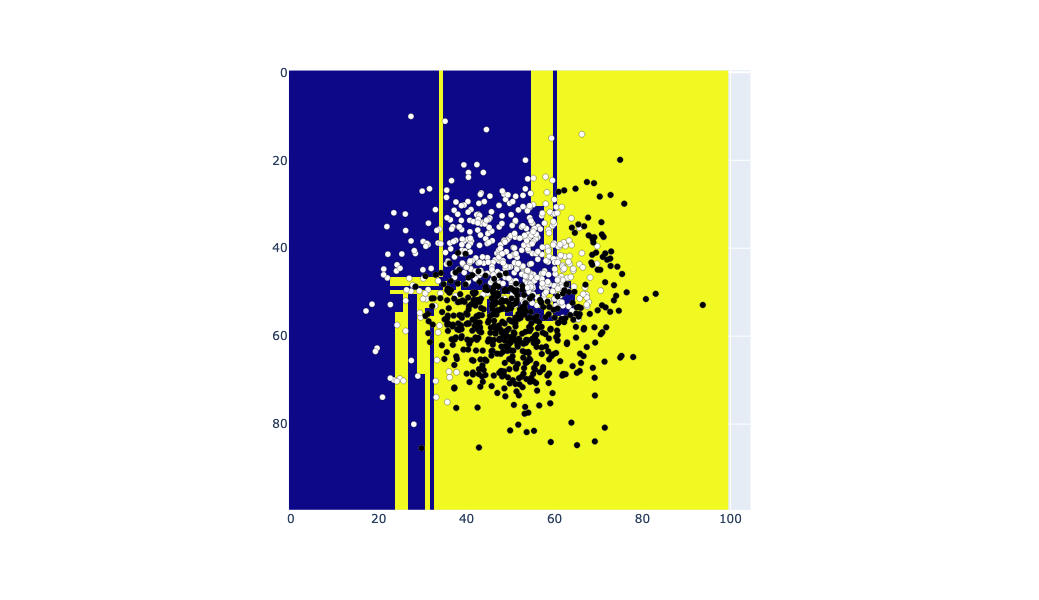

1.0

In [63]:
m = DecisionTreeClassifier()
_ = m.fit(X, y)
DBPlot(m, X, y)
m.score(X, y)

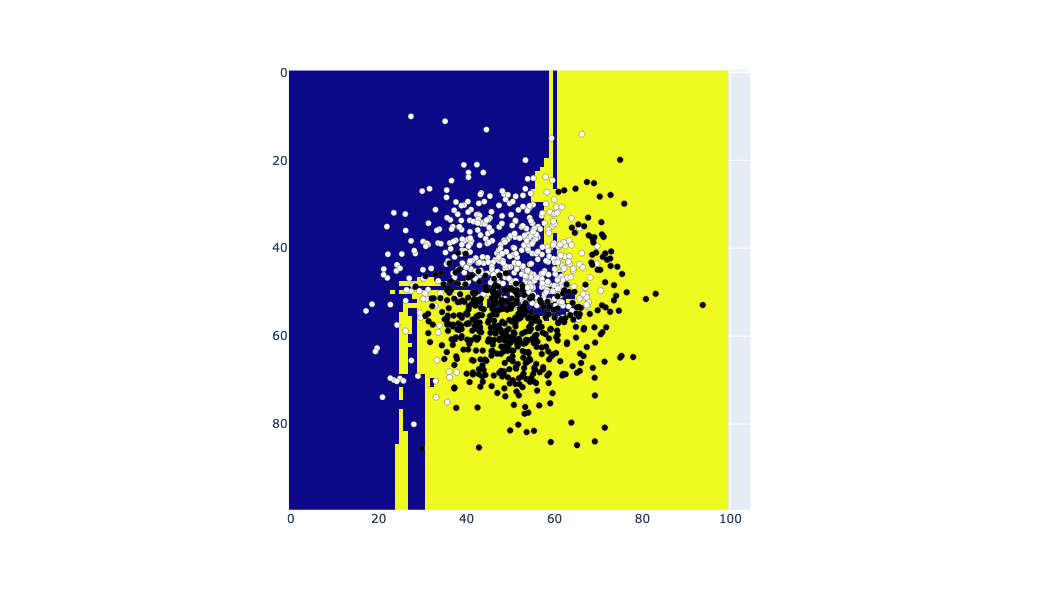

1.0

In [64]:
m = RandomForestClassifier()
_ = m.fit(X, y)
DBPlot(m, X, y)
m.score(X, y)

Als nächstes testen wir die SVM-Modelle einmal auf der Energievorhersage.

In [65]:
clf_SVCL = SVC(kernel="linear")
clf_SVCL.fit(egywth_train[["SDK", "NM", "VPM", "TMK", "Weekday"]], egywth_train.EV_HT_740_IS_ON.values)

egywth_train["pred_SVCL"] = clf_SVCL.predict(egywth_train[["SDK", "NM", "VPM", "TMK", "Weekday"]])
print('Train Accuracy: {:.2f}'.format(accuracy_score(egywth_train.EV_HT_740_IS_ON.values, egywth_train.pred_SVCL)))
egywth_test["pred_SVCL"] = clf_SVCL.predict(egywth_test[["SDK", "NM", "VPM", "TMK", "Weekday"]])
print('Test Accuracy: {:.2f}'.format(accuracy_score(egywth_test.EV_HT_740_IS_ON.values, egywth_test.pred_SVCL)))

Train Accuracy: 0.59
Test Accuracy: 0.57


In [66]:
clf_SVCP = SVC(kernel="poly", degree=3)
clf_SVCP.fit(egywth_train[["SDK", "NM", "VPM", "TMK", "Weekday"]], egywth_train.EV_HT_740_IS_ON.values)

egywth_train["pred_SVCP"] = clf_SVCP.predict(egywth_train[["SDK", "NM", "VPM", "TMK", "Weekday"]])
print('Train Accuracy: {:.2f}'.format(accuracy_score(egywth_train.EV_HT_740_IS_ON.values, egywth_train.pred_SVCL)))
egywth_test["pred_SVCP"] = clf_SVCP.predict(egywth_test[["SDK", "NM", "VPM", "TMK", "Weekday"]])
print('Test Accuracy: {:.2f}'.format(accuracy_score(egywth_test.EV_HT_740_IS_ON.values, egywth_test.pred_SVCP)))

Train Accuracy: 0.59
Test Accuracy: 0.52


In [67]:
clf_SVCR = SVC(kernel="rbf", gamma=1)
clf_SVCR.fit(egywth_train[["SDK", "NM", "VPM", "TMK", "Weekday"]], egywth_train.EV_HT_740_IS_ON.values)

egywth_train["pred_SVCR"] = clf_SVCR.predict(egywth_train[["SDK", "NM", "VPM", "TMK", "Weekday"]])
print('Train Accuracy: {:.2f}'.format(accuracy_score(egywth_train.EV_HT_740_IS_ON.values, egywth_train.pred_SVCR)))
egywth_test["pred_SVCR"] = clf_SVCR.predict(egywth_test[["SDK", "NM", "VPM", "TMK", "Weekday"]])
print('Test Accuracy: {:.2f}'.format(accuracy_score(egywth_test.EV_HT_740_IS_ON.values, egywth_test.pred_SVCR)))

Train Accuracy: 0.97
Test Accuracy: 0.53


Die Vorhersagequalität dieser Modelle ist nicht sehr hoch. Das liegt daran, dass Trennlinien im Datensatz nicht gegeben sind. In solchen Fällen sind Entscheidungsbäume und Ensambles besser geeignet, obwohl sie wie gezeigt schnell zum Overfitting neigen. Dennoch gehören SVM mit zu den beliebtesten Modellen. Deshalb empfiehlt es sich immer vorher ein Scatter-Diagramm mit der Zielklasse als Farbcode zu erstellen, um zu sehen, ob sich klare Grenzen erkennen lassen.

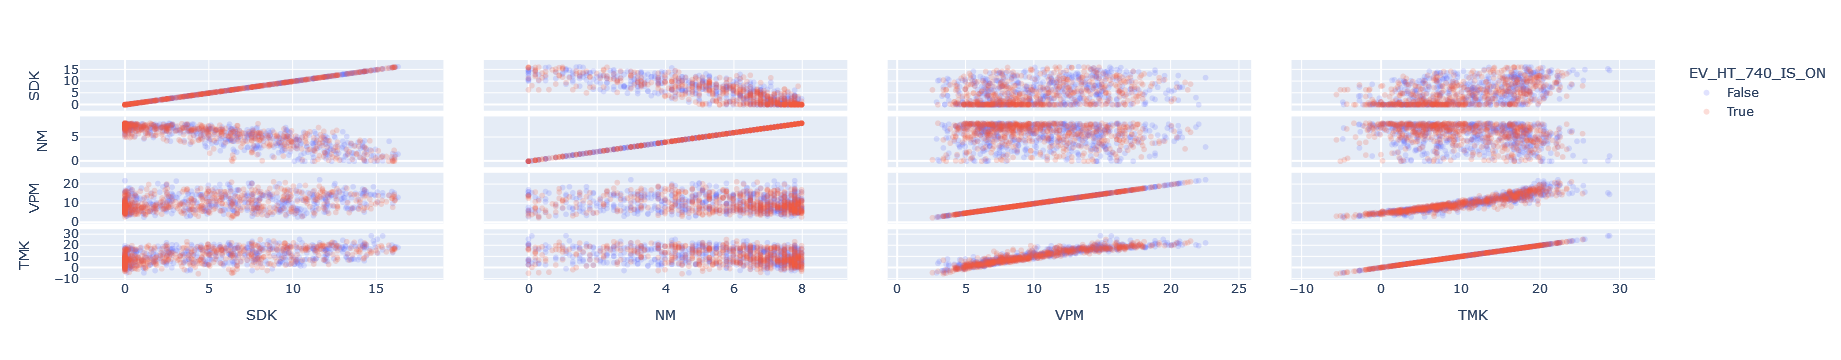

In [68]:
px.scatter_matrix(egywth, dimensions=["SDK", "NM", "VPM", "TMK"], opacity=.2, color="EV_HT_740_IS_ON")

## Regressionsbäume und Regressions-Ensemble-Modelle

Wir können Entscheidungsbäume und Ensemble-Modelle auch als Regressionsmodell benutzen. Hierbei soll nicht eine spezifische Klasse einer kategorischen Variable vorhergesagt werden, sondern eine numerische Variable. Das Prinzip der Regressionsvarianten ist das gleiche wie beiden diskreten Modellen, nur werden die Ergebnisse nicht durch Mehrheitsabstimmung kombiniert, sondern linear addiert.

Vergleichen wir die oben genannten Varianten einmal in ihren Regressions-Varianten und sagen den Energieverbrauch `ES_Lab` wie bei den Regressionsmodellen voraus.

In [69]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score
import time 

reg_models=[("Linear Model", LinearRegression()),
            ("Decision Tree", DecisionTreeRegressor()),
            ("Random Forest", RandomForestRegressor()),
            ("Gradient Boost", GradientBoostingRegressor()),
            ("XGBoost", xgb.XGBRegressor()),
            ("Stack", StackingRegressor(estimators=[('lm', LinearRegression()),('dt',DecisionTreeRegressor())])),
            ("Vote", VotingRegressor(estimators=[('lm', LinearRegression()),('dt',DecisionTreeRegressor())])),
            ("BoostStack", StackingRegressor(estimators=[('lm', LinearRegression()),('rf',RandomForestRegressor()),('xgb',xgb.XGBRegressor())])),
            ("SVM_l", SVR(kernel="linear")),
            ("SVM_p", SVR(kernel="poly")),
            ("SVM_r", SVR(kernel="rbf")),
            ("SVMStack", StackingRegressor(estimators=[('lm', LinearRegression()),('svm',SVR(kernel="linear")),('rf',RandomForestRegressor()),('xgb',xgb.XGBRegressor())])),]

resdf=[]
for mtype,model in reg_models:
    starttime=time.time()
    model.fit(egywth_train[["SDK", "NM", "VPM", "TMK", "Weekday"]], egywth_train.ES_Lab.values)
    fittime=time.time()
    pred_train = model.predict(egywth_train[["SDK", "NM", "VPM", "TMK", "Weekday"]])
    pred_test  = model.predict(egywth_test[["SDK", "NM", "VPM", "TMK", "Weekday"]])
    predtime=time.time()
    resdf.append({"type":mtype,
                  "train.MSE":mean_squared_error(egywth_train.ES_Lab.values, pred_train),
                  "train.RMSE":root_mean_squared_error(egywth_train.ES_Lab.values, pred_train),
                  "train.R2":r2_score(egywth_train.ES_Lab.values, pred_train),
                  "test.MSE":mean_squared_error(egywth_test.ES_Lab.values, pred_test),
                  "test.RMSE":root_mean_squared_error(egywth_test.ES_Lab.values, pred_test),
                  "test.R2":r2_score(egywth_test.ES_Lab.values, pred_test),
                  "fittime":fittime-starttime,
                  "predtime":predtime-fittime})

In [70]:
resdf=pd.DataFrame(resdf)
resdf

type   train.MSE  train.RMSE  train.R2    test.MSE  test.RMSE  \
0     Linear Model  150.578358   12.271037  0.872429  148.940022  12.204099   
1    Decision Tree    0.000000    0.000000  1.000000  287.613079  16.959159   
2    Random Forest   20.054334    4.478207  0.983010  147.960519  12.163902   
3   Gradient Boost   59.601825    7.720222  0.949505  143.138568  11.964053   
4          XGBoost    0.093760    0.306203  0.999921  167.023885  12.923772   
5            Stack  112.650965   10.613716  0.904562  146.830704  12.117372   
6             Vote   37.644590    6.135519  0.968107  171.941523  13.112647   
7       BoostStack   59.854969    7.736599  0.949291  133.734465  11.564362   
8            SVM_l  152.174362   12.335897  0.871077  151.125168  12.293298   
9            SVM_p  196.578512   14.020646  0.833458  209.084652  14.459760   
10           SVM_r  221.732863   14.890697  0.812147  244.191003  15.626612   
11        SVMStack   59.575934    7.718545  0.949527  134.115915  11.580843   

     test.R2   fittime  predtime  
0   0.871694  0.023908  0.002734  
1   0.752232  0.003008  0.001000  
2   0.872538  0.142732  0.013523  
3   0.876691  0.060136  0.002001  
4   0.856115  0.064104  0.003510  
5   0.873511  0.030054  0.003507  
6   0.851879  0.003506  0.003000  
7   0.884793  1.062499  0.018716  
8   0.869811  0.021525  0.014138  
9   0.819881  0.017513  0.013023  
10  0.789639  0.014188  0.038050  
11  0.884464  1.122270  0.029528

Hier sehen wir, wieder das Overfitten der Entscheidungsbäume im Trainingsdatensatz, aber schlechter als Regressionsmodelle abschneiden im Testdatensatz. Wir sehen auch, dass die Regressions-Ensamble-Modelle sogar besser abschneiden als die klassischen linearen Regressionsmodelle. Das liegt daran das die zugrundeliegenden Entscheidungsbäume vom Normalen linearen Verhalten abweichende Ausnahmen besser erfassen können. Die Stacking Varianten schneiden zum Teil am besten ab, aber weisen auch die größten Trainingszeiten auf.

<div id="tsparticles_question" style="width: 100%; height:5em; background-color: white;">
    <div class="questions" style="letter-spacing: 0.03em; font-family: Protomolecule; font-size: 2.3em; position: absolute; top: 50%; left: 50%; transform: translate(-50%, -50%); color: black; z-index: 5;">f&nbsp;&nbsp;r&nbsp;&nbsp;a&nbsp;&nbsp;g&nbsp;&nbsp;e&nbsp;&nbsp;n&nbsp;&nbsp;?</div>
</div>